# Healthcare Data Analysis and Predictive Modeling

## Table of Contents

- [Project Overview](#project-overview)
- [Dataset](#dataset)
- [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
- [Predictive Modeling](#predictive-modeling)
- [Results]()
- [Conclusion]()

---

## Project Overview

Welcome to the Project: Healthcare Data Analysis and Predictive Modeling! In this project, we aim to leverage data analysis and predictive modeling techniques to improve healthcare outcomes. Specifically, our goal is to predict patients at risk of diabetes infection based on a comprehensive healthcare dataset.

### Project Objectives

1. **Exploratory Data Analysis (EDA):** Conduct a thorough exploration of the healthcare dataset to gain insights into patient demographics, medical history, and risk factors associated with diabetes.

2. **Predictive Modeling:** Build and evaluate predictive models that can accurately identify patients with potential diabetes infection based on the dataset's features.

3. **Insights and Recommendations:** Provide actionable insights and recommendations to healthcare professionals to aid in early diagnosis and intervention for patients at risk of diabetes.

---

## Dataset

We are working with a healthcare dataset containing information on diabetes patients. The dataset includes various features such as age, BMI and glucose levels, among others. The target variable is binary, indicating whether a patient has a diabetes infection (1) or not (0).

**Dataset Source:** The dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [206]:
# Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import skimpy as skim
from sklearn import metrics as m
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [121]:
# Loading the dataset
df = pd.read_csv('./Diabetes_Dataset/diabetes.csv')

In [122]:
# Summary of the dataset
skim.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 768    │ │ int32       │ 7     │                                                          │
│ │ Number of columns │ 9      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %   ┃ mean  ┃ sd    ┃ p0      ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Pregnancies              │   0 │      0 │   3.8 │   3.4 │       0 │     1 │     3 │     6 │    17 │  ▇▅▃▁  │  │
│ │ Glucose                  │   0 │      0 │   120 │    32 │       0 │    99 │   120 │   140 │   200 │   ▅▇▃▂ │  │
│ │ BloodPressure            │   0 │      0 │    69 │    19 │       0 │    62 │    72 │    80 │   120 │ ▁ ▂▇▃  │  │
│ │ SkinThickness            │   0 │      0 │    21 │    16 │       0 │     0 │    23 │    32 │    99 │  ▇▇▅   │  │
│ │ Insulin                  │   0 │      0 │    80 │   120 │       0 │     0 │    30 │   130 │   850 │   ▇▂   │  │
│ │ BMI                      │   0 │      0 │    32 │   7.9 │       0 │    27 │    32 │    37 │    67 │  ▁▇▆▁  │  │
│ │ DiabetesPedigreeFunction │   0 │      0 │  0.47 │  0.33 │   0.078 │  0.24 │  0.37 │  0.63 │   2.4 │  ▇▃▁   │  │
│ │ Age                      │   0 │      0 │    33 │    12 │      21 │    24 │    29 │    41 │    81 │  ▇▃▂▁  │  │
│ │ Outcome                  │   0 │      0 │  0.35 │  0.48 │       0 │     0 │     0 │     1 │     1 │ ▇    ▅ │  │
│ └──────────────────────────┴─────┴────────┴───────┴───────┴─────────┴───────┴───────┴───────┴───────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [123]:
# Viewing the dataset
display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1


In [124]:
# Checking columns with 0 values
(df[df.columns]==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**Observation**: Columns like `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` and `BMI` shouldn't have 0 values (*for example, a patient cannot have a BMI reading of 0*), so the 0 values will be treated as null values. Columns with many outliers will be replaced with the Median and columns with little to no outliers will be replaced with the Mean.

---

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis is a crucial step in understanding the dataset and preparing it for modeling. During this phase, we perform the following tasks:

- Data cleaning and preprocessing.
- Descriptive statistics and data summary.
- Visualization of key features and distributions.
- Identification of correlations and patterns.

Our EDA findings will guide the feature selection and engineering process for the predictive modeling phase.


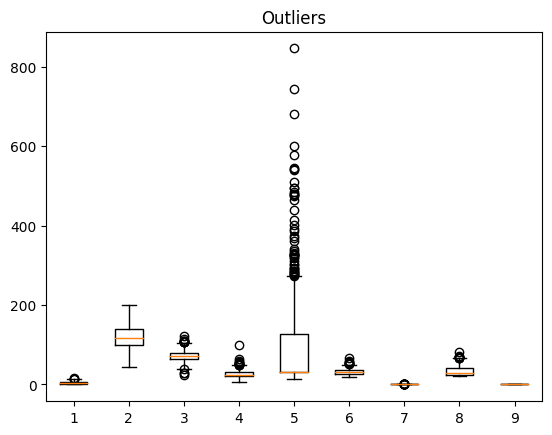

In [215]:
# Checking for outliers
plt.boxplot(df)
plt.title('Outliers')

plt.show()

**Observation**: Data contains a lot of outliers, especially the Insulin column. Standardizing the data before modelling will be wise.

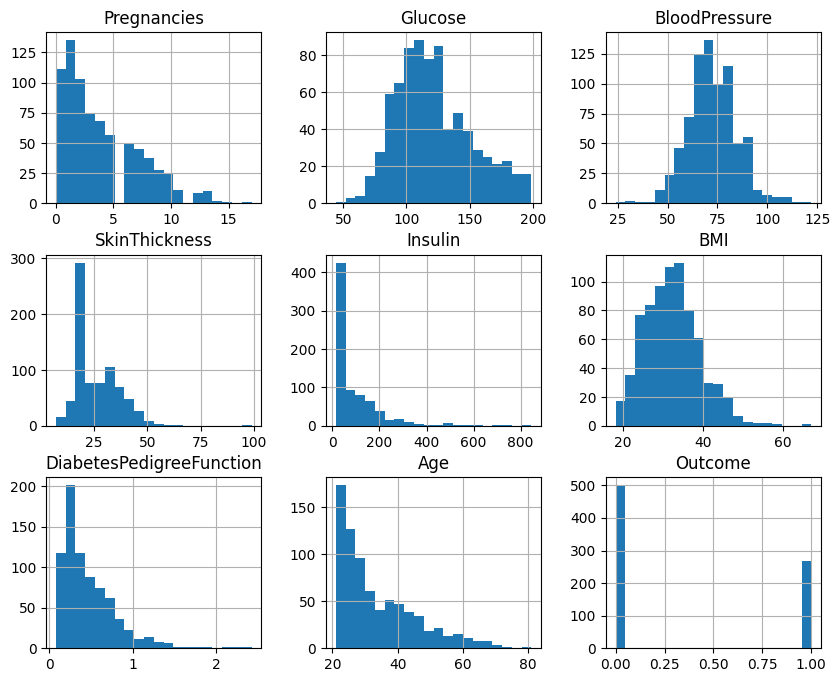

In [217]:
# Visualizing the data distribution
df.hist(bins= 20, figsize=(10,8))

plt.show()

**Observation**: Columns like `Glucose` and `BloodPressure` have normal distributions but columns like `SkinThickness` and `Insulin` have skewed distributions

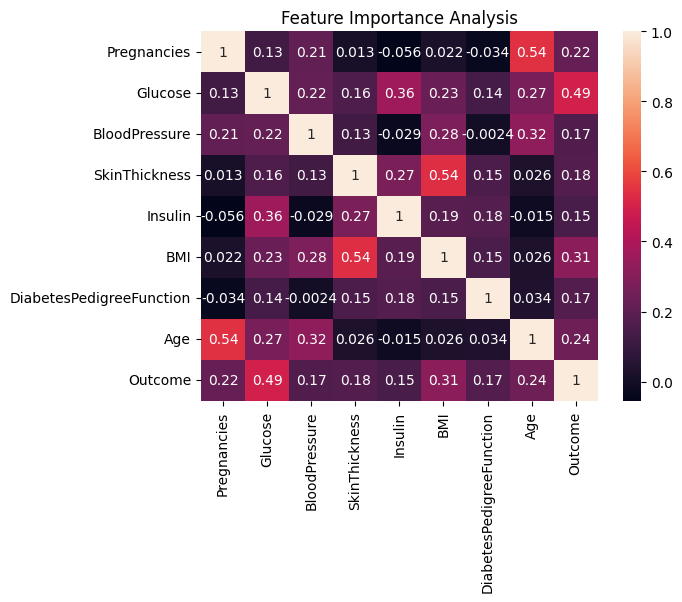

In [213]:
# Feature Importance analysis using correlation matrix
sns.heatmap(df.corr(), annot=True)
plt.title('Feature Importance Analysis')

plt.show()

**Observation**: Columns like `Glucose` and `BMI` show high correlation with diabetes outcome (*the higher your glucose levels or BMI, the more likely you have diabetes*).

Text(0.5, 1.0, 'Target variable distribution')

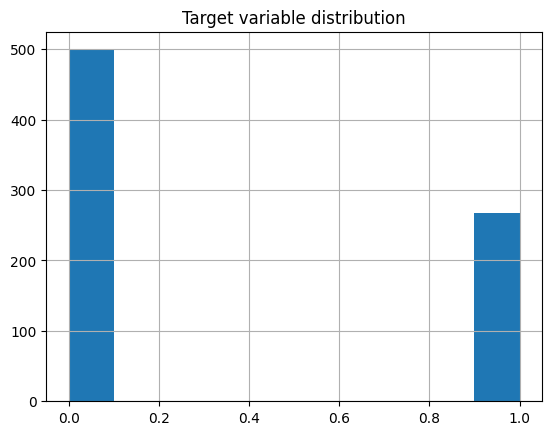

In [218]:
# Checking the distribution of the target variable
df['Outcome'].hist()
plt.title('Target variable distribution')

**Observation**: there are `500` cases of diabetes, compared to `268` cases of no diabetes.

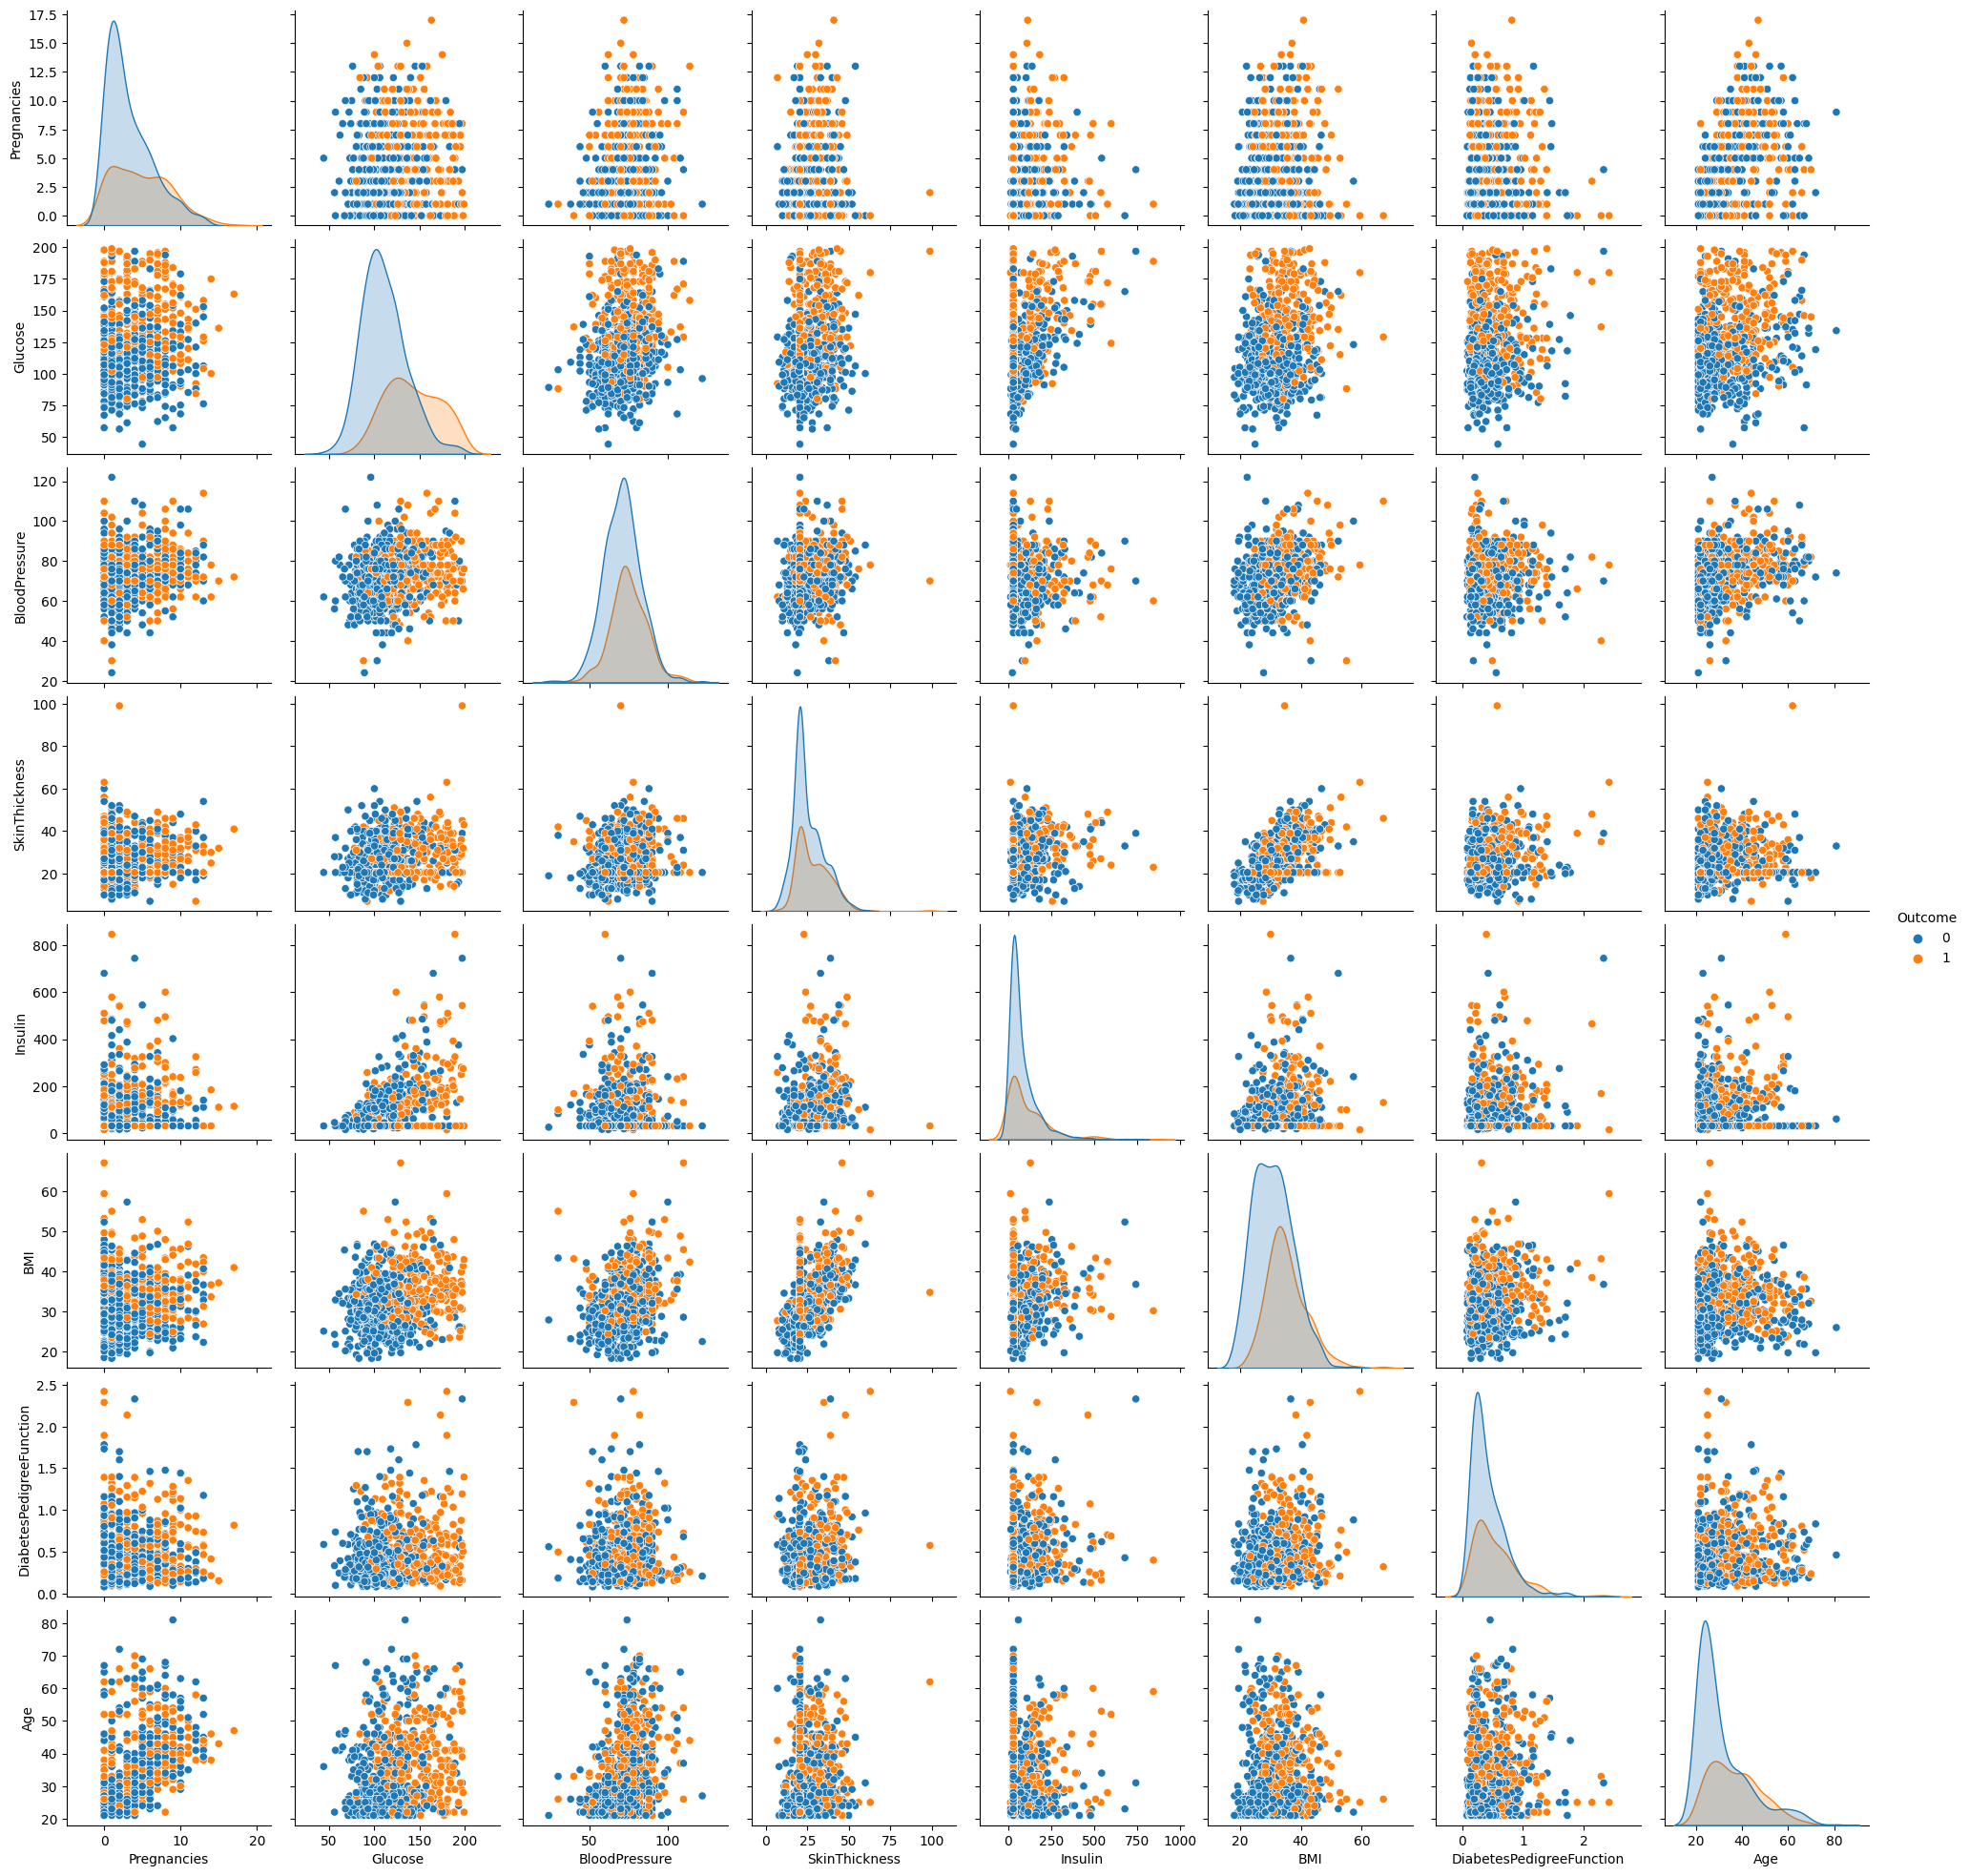

In [219]:
# Pairwise plot of the dataset
sns.pairplot(df, hue='Outcome')

plt.show()

---

## Predictive Modeling

In the predictive modeling phase, we aim to develop a machine learning model capable of predicting diabetes infections accurately. The key steps in this phase include:

1. **Data Preprocessing:** Feature selection and engineering.

2. **Model Selection, Training and Tuning:** Selecting and training a Machine Learning model on the dataset and fine-tuning hyperparameters for optimal performance.

3. **Model Evaluation:** Assessing the model's performance using appropriate metrics like accuracy, precision, recall, and F1-score.

### Data Preprocessing
---

In [220]:
# Replacing 0 values in columns with outliers using Median
for i in ['BloodPressure', 'Insulin', 'BMI']:
    df[i].replace(0, df[i].median(), inplace=True)

# Replacing 0 values in columns without outliers using Mean
for i in ['Glucose', 'SkinThickness']:
    df[i].replace(0, df[i].mean(), inplace=True)

In [221]:
# Confirm replacement
(df[df.columns]==0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [222]:
# Split data into target and features
X = df.drop('Outcome', axis=1)
y = df[['Outcome']]

In [223]:
# Initialize scaler objects
x_scaler = StandardScaler()

# Standardize X to handle outliers
X_scaled = x_scaler.fit_transform(X)

# Confirm Standardization
X_scaled

array([[ 0.63994726,  0.86527574, -0.03198993, ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.5283186 , ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.69376149, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.03198993, ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.02464727, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.19743282, ..., -0.29849289,
        -0.47378505, -0.87137393]])

In [224]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 50)

### Model Selection, Training and Tuning
---

In [225]:
# Declare the model object
xgboost = XGBClassifier(learning_rate=0.01, max_depth=10, n_estimators=300)

In [226]:
# Training the model
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [227]:
# Make predictions
xgb_y_pred = xgboost.predict(X_test)

# View predictions
xgb_y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

### Model Evaluation
---

In [228]:
# Measure the model's Accuracy, Precision, Recall and F1 score.
# Also check the confusion metrics and classification report.
accuracy = m.accuracy_score(y_test, xgb_y_pred)
precision = m.precision_score(y_test, xgb_y_pred)
recall = m.recall_score(y_test, xgb_y_pred)
f1 = m.f1_score(y_test, xgb_y_pred)
matrix = m.confusion_matrix(y_test, xgb_y_pred)
report = m.classification_report(y_test, xgb_y_pred)

print(f'Accuracy: {accuracy.round(2)}')
print(f'Precision: {precision.round(2)}')
print(f'Recall: {recall.round(2)}')
print(f'F1 Score: {f1.round(2)}')
print(f'Confusion Matrix:\n {matrix}')
print(f'Classificatio Report:\n {report}')

Accuracy: 0.77
Precision: 0.74
Recall: 0.53
F1 Score: 0.62
Confusion Matrix:
 [[91 10]
 [25 28]]
Classificatio Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       101
           1       0.74      0.53      0.62        53

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



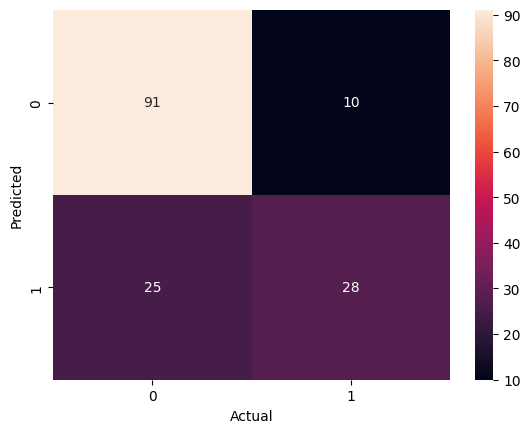

In [229]:
# Visualising the confusion matrix
sns.heatmap(matrix, annot=True, )
plt.xlabel('Actual')
plt.ylabel('Predicted')


plt.show()

**Observation**: Model Accuracy: `77%`, Model Precision: `74%`

---

## Results

Our project's success will be measured by the predictive accuracy of our model and the actionable insights we provide to healthcare professionals. We have presented our results through:

- Performance metrics and evaluation scores.
- Visualizations of key findings.
- Feature importance analysis.
- Recommendations for early diagnosis and intervention.

---

## Conclusion

This project combines data analysis and predictive modeling to tackle a critical healthcare issue: diabetes infections. By conducting in-depth exploratory data analysis and developing accurate predictive models, we aim to contribute to early diagnosis and improved patient outcomes.